# Benthic habitat loss in the SKØG model  - at depths < 30m

(c) TJŠJ, please don't share beyond: Susan, Debby, Chris, Iria
(preliminary results / experimental plots)

We've recently completed a series of experimental runs comparing carbonate chemistry in the Salish Sea under two scenarios:

    BR (BASE RUN / PRESENT DAY):
        present-day wind, 
        present-day temperature, 
        present-day tides, 
        present-day atmospheric carbon dioxide concentrations 
            (~409 uatm),
        present-day lateral boundary 
            (open Pacific Ocean) dissolved inorganic carbon 

    PI (PREINDUSTRIAL RUN):
        present-day wind, 
        present-day temperature, 
        present-day tides, 
        preindustrial atmospheric carbon dioxide concentrations 
            (~280 uatm),
        estimated preindustrial lateral boundary 
            (open Pacific Ocean) dissolved inorganic carbon 
        
Here, we contrast the benthic habitat conditions in the two scenarios, using $\Omega_A$ (aragonite saturation state) as a marker for habitat viability. Physical oceanographers and biogeochemists often think of $\Omega_A$>1 as viable habitat and $\Omega_A$<1 as corrosive habitat; ecologists know that it's more complicated than that. I first look at some monthly averages and later look at a days-under-threshold-viability metric.

In [247]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [248]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [249]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean as cm
import warnings
warnings.filterwarnings('ignore')
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')

# from matplotlib import reload

%matplotlib inline

### The benthic habitat in the Salish Sea

Here is a map of the benthic habitat in the Salish Sea, as seen by the SalishSeaCast model:

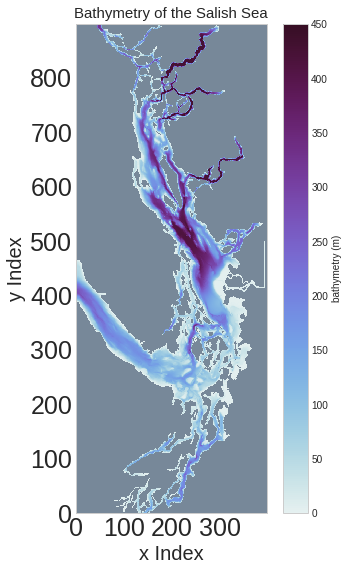

In [250]:
## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)
fact = 0.3
plot_bathy(bath1,'Bathymetry of the Salish Sea', \
               cm.cm.dense,20*fact,30*fact,0,450,'bathymetry (m)','')

([], <a list of 0 Text yticklabel objects>)

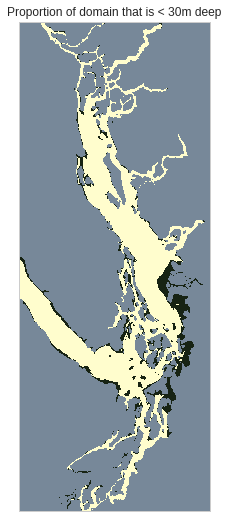

In [251]:
thres = 0.5

fact = 1.2
tf = 12
tcmap = cm.cm.speed
tvmin = -1
tvmax = 1
bath1_ar = bath1[:]
fig = plt.figure(figsize=(5*fact,7.5*fact))

ax = fig.add_subplot(1,1,1)
#tplt = np.ma.masked_values(PI_OmA_apr_benthos_avg,0)
PI_OmA_apr_benthos_avg_H = np.copy(bath1_ar)
w = np.where( (bath1_ar<30))
PI_OmA_apr_benthos_avg_H[w]=1
w2 = np.where(bath1_ar>30)
PI_OmA_apr_benthos_avg_H[w2]=-1
tplt = PI_OmA_apr_benthos_avg_H
mesh = ax.pcolormesh(PI_OmA_apr_benthos_avg_H, cmap=tcmap, vmin=tvmin, vmax=tvmax)
viz_tools.set_aspect(ax)
viz_tools.plot_land_mask(ax, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax.set_title('Proportion of domain that is < 30m deep', fontsize = tf)
plt.xticks([])
plt.yticks([])


### Technical note on how .pkl / .nc was extracted:

extraction pyscripts are in /carbon_dev/ECOLOGY_PROJECT/extraction_pyscripts_and_intermediate_pickles/
of format extract_avg_monthly_feb.py (go straight from actual model results to pickles containing monthly average benthic OmA...). PI_OmA_year_benthos_mbath.pkl is just a combination of the monthly .pkls

In [252]:
# np.type(bath1)

### A yearly average of $\Omega_A$ in the BR and PI scenarios

As a first look, let's visualise the yearly average benthic $\Omega_A$ ($\Omega_A$ in the lowest grid cell in the model in a given place) in the BR and PI scenarios, and how much it has changed.


In [253]:
f = open('./PI_OmA_year_benthos_mbath.pkl', 'rb')
PI_OmA_year_benthos_mbath = pickle.load(f)   
f = open('./BR_OmA_year_benthos_mbath.pkl', 'rb')
BR_OmA_year_benthos_mbath = pickle.load(f)   

PI_OmA_year_benthos_avg = np.nanmean(PI_OmA_year_benthos_mbath, axis = 0)
BR_OmA_year_benthos_avg = np.nanmean(BR_OmA_year_benthos_mbath, axis = 0)


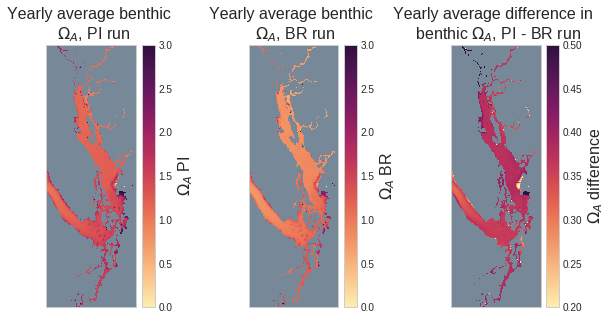

In [254]:
fact = 0.7
tf = 16
tcmap = cm.cm.matter

fig = plt.figure(figsize=(12*fact,6.5*fact))

##preindustrial
ax1 = fig.add_subplot(1,3,1)
tplt = np.ma.masked_values(PI_OmA_year_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('Yearly average benthic \n $\Omega_A$, PI run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ PI', fontsize = tf)
plt.xticks([])
plt.yticks([])

##presentday
ax1 = fig.add_subplot(1,3,2)
tplt = np.ma.masked_values(BR_OmA_year_benthos_avg,0)
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0, vmax=3)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('Yearly average benthic \n $\Omega_A$, BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ BR', fontsize = tf)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,3,3)
tplt = np.ma.masked_values(PI_OmA_year_benthos_avg,0) -\
np.ma.masked_values(BR_OmA_year_benthos_avg,0) 
mesh = ax1.pcolormesh(tplt, cmap=tcmap, vmin=0.2, vmax=0.5)
viz_tools.plot_land_mask(ax1, \
                         '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc', color = 'lightslategrey')
ax1.set_title('Yearly average difference in \n benthic $\Omega_A$, PI - BR run', fontsize = tf)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\Omega_A$ difference', fontsize = tf)
plt.xticks([])
plt.yticks([])

plt.tight_layout()

In [255]:
PI_OmA_jan_benthos_avg = (PI_OmA_year_benthos_mbath[0,:,:])
BR_OmA_jan_benthos_avg = (BR_OmA_year_benthos_mbath[0,:,:])
PI_OmA_feb_benthos_avg = (PI_OmA_year_benthos_mbath[1,:,:])
BR_OmA_feb_benthos_avg = (BR_OmA_year_benthos_mbath[1,:,:])
PI_OmA_mar_benthos_avg = (PI_OmA_year_benthos_mbath[2,:,:])
BR_OmA_mar_benthos_avg = (BR_OmA_year_benthos_mbath[2,:,:])
PI_OmA_apr_benthos_avg = (PI_OmA_year_benthos_mbath[3,:,:])
BR_OmA_apr_benthos_avg = (BR_OmA_year_benthos_mbath[3,:,:])
PI_OmA_may_benthos_avg = (PI_OmA_year_benthos_mbath[4,:,:])
BR_OmA_may_benthos_avg = (BR_OmA_year_benthos_mbath[4,:,:])
PI_OmA_jun_benthos_avg = (PI_OmA_year_benthos_mbath[5,:,:])
BR_OmA_jun_benthos_avg = (BR_OmA_year_benthos_mbath[5,:,:])
PI_OmA_jul_benthos_avg = (PI_OmA_year_benthos_mbath[6,:,:])
BR_OmA_jul_benthos_avg = (BR_OmA_year_benthos_mbath[6,:,:])
PI_OmA_aug_benthos_avg = (PI_OmA_year_benthos_mbath[7,:,:])
BR_OmA_aug_benthos_avg = (BR_OmA_year_benthos_mbath[7,:,:])
PI_OmA_sep_benthos_avg = (PI_OmA_year_benthos_mbath[8,:,:])
BR_OmA_sep_benthos_avg = (BR_OmA_year_benthos_mbath[8,:,:])
PI_OmA_oct_benthos_avg = (PI_OmA_year_benthos_mbath[9,:,:])
BR_OmA_oct_benthos_avg = (BR_OmA_year_benthos_mbath[9,:,:])
PI_OmA_nov_benthos_avg = (PI_OmA_year_benthos_mbath[10,:,:])
BR_OmA_nov_benthos_avg = (BR_OmA_year_benthos_mbath[10,:,:])
PI_OmA_dec_benthos_avg = (PI_OmA_year_benthos_mbath[11,:,:])
BR_OmA_dec_benthos_avg = (BR_OmA_year_benthos_mbath[11,:,:])


In [256]:
list_BR_arrays = [BR_OmA_jan_benthos_avg,BR_OmA_feb_benthos_avg,BR_OmA_mar_benthos_avg,\
                 BR_OmA_apr_benthos_avg,BR_OmA_may_benthos_avg,BR_OmA_jun_benthos_avg,\
                 BR_OmA_jul_benthos_avg,BR_OmA_aug_benthos_avg,BR_OmA_sep_benthos_avg,\
                 BR_OmA_oct_benthos_avg,BR_OmA_nov_benthos_avg,BR_OmA_dec_benthos_avg]
list_PI_arrays = [PI_OmA_jan_benthos_avg,PI_OmA_feb_benthos_avg,PI_OmA_mar_benthos_avg,\
                 PI_OmA_apr_benthos_avg,PI_OmA_may_benthos_avg,PI_OmA_jun_benthos_avg,\
                 PI_OmA_jul_benthos_avg,PI_OmA_aug_benthos_avg,PI_OmA_sep_benthos_avg,\
                 PI_OmA_oct_benthos_avg,PI_OmA_nov_benthos_avg,PI_OmA_dec_benthos_avg]

#check that they're all different
# for i in range(0,len(list_BR_arrays)):
#     t_array_BR = list_BR_arrays[i]
#     print(t_array_BR[250,250])
    
# for i in range(0,len(list_PI_arrays)):
#     t_array_PI = list_PI_arrays[i]
#     print(t_array_PI[250,250])
    

###  histograms of benthic $\Omega_A$ for domain <30m

To get a more quantitative look at these $\Omega_A$ distributions, let's look at histograms of monthly average benthic $\Omega_A$ for the two scenarios - .

In [257]:
bath1_ar = bath1[:]

#make a manual histogramming code
step = 0.2
t_start = 0
t_end = 3
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop
        
PI_OmA_year_benthos_ocean = \
PI_OmA_year_benthos_avg[(PI_OmA_year_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_year_benthos_ocean)
t_PI_year = np.copy(bin_propPI)
BR_OmA_year_benthos_ocean = \
BR_OmA_year_benthos_avg[(BR_OmA_year_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_year_benthos_ocean)
t_BR_year = np.copy(bin_propBR)



In [258]:
PI_OmA_jan_benthos_ocean = \
PI_OmA_jan_benthos_avg[(PI_OmA_jan_benthos_avg<1e10) & (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_jan_benthos_ocean)
t_PI_jan = np.copy(bin_propPI)
BR_OmA_jan_benthos_ocean = \
BR_OmA_jan_benthos_avg[(BR_OmA_jan_benthos_avg<1e10)&  (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_jan_benthos_ocean)
t_BR_jan = np.copy(bin_propBR)
PI_OmA_feb_benthos_ocean = \
PI_OmA_feb_benthos_avg[(PI_OmA_feb_benthos_avg<1e10) & (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_feb_benthos_ocean)
t_PI_feb = np.copy(bin_propPI)
BR_OmA_feb_benthos_ocean = \
BR_OmA_feb_benthos_avg[(BR_OmA_feb_benthos_avg<1e10 )& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_feb_benthos_ocean)
t_BR_feb = np.copy(bin_propBR)
PI_OmA_mar_benthos_ocean = \
PI_OmA_mar_benthos_avg[(PI_OmA_mar_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_mar_benthos_ocean)
t_PI_mar = np.copy(bin_propPI)
BR_OmA_mar_benthos_ocean = \
BR_OmA_mar_benthos_avg[(BR_OmA_mar_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_mar_benthos_ocean)
t_BR_mar = np.copy(bin_propBR)
PI_OmA_apr_benthos_ocean = \
PI_OmA_apr_benthos_avg[(PI_OmA_apr_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_apr_benthos_ocean)
t_PI_apr = np.copy(bin_propPI)
BR_OmA_apr_benthos_ocean = \
BR_OmA_apr_benthos_avg[(BR_OmA_apr_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_apr_benthos_ocean)
t_BR_apr = np.copy(bin_propBR)
PI_OmA_may_benthos_ocean = \
PI_OmA_may_benthos_avg[(PI_OmA_may_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_may_benthos_ocean)
t_PI_may = np.copy(bin_propPI)
BR_OmA_may_benthos_ocean = \
BR_OmA_may_benthos_avg[(BR_OmA_may_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_may_benthos_ocean)
t_BR_may = np.copy(bin_propBR)
PI_OmA_jun_benthos_ocean = \
PI_OmA_jun_benthos_avg[(PI_OmA_jun_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_jun_benthos_ocean)
t_PI_jun = np.copy(bin_propPI)
BR_OmA_jun_benthos_ocean = \
BR_OmA_jun_benthos_avg[(BR_OmA_jun_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_jun_benthos_ocean)
t_BR_jun = np.copy(bin_propBR)
PI_OmA_jul_benthos_ocean = \
PI_OmA_jul_benthos_avg[(PI_OmA_jul_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_jul_benthos_ocean)
t_PI_jul = np.copy(bin_propPI)
BR_OmA_jul_benthos_ocean = \
BR_OmA_jul_benthos_avg[(BR_OmA_jul_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_jul_benthos_ocean)
t_BR_jul = np.copy(bin_propBR)
PI_OmA_aug_benthos_ocean = \
PI_OmA_aug_benthos_avg[(PI_OmA_aug_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_aug_benthos_ocean)
t_PI_aug = np.copy(bin_propPI)
BR_OmA_aug_benthos_ocean = \
BR_OmA_aug_benthos_avg[(BR_OmA_aug_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_aug_benthos_ocean)
t_BR_aug = np.copy(bin_propBR)
PI_OmA_sep_benthos_ocean = \
PI_OmA_sep_benthos_avg[(PI_OmA_sep_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_sep_benthos_ocean)
t_PI_sep = np.copy(bin_propPI)
BR_OmA_sep_benthos_ocean = \
BR_OmA_sep_benthos_avg[(BR_OmA_sep_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_sep_benthos_ocean)
t_BR_sep = np.copy(bin_propBR)
PI_OmA_oct_benthos_ocean = \
PI_OmA_oct_benthos_avg[(PI_OmA_oct_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_oct_benthos_ocean)
t_PI_oct = np.copy(bin_propPI)
BR_OmA_oct_benthos_ocean = \
BR_OmA_oct_benthos_avg[(BR_OmA_oct_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_oct_benthos_ocean)
t_BR_oct = np.copy(bin_propBR)
PI_OmA_nov_benthos_ocean = \
PI_OmA_nov_benthos_avg[(PI_OmA_nov_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_nov_benthos_ocean)
t_PI_nov = np.copy(bin_propPI)
BR_OmA_nov_benthos_ocean = \
BR_OmA_nov_benthos_avg[(BR_OmA_nov_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_nov_benthos_ocean)
t_BR_nov = np.copy(bin_propBR)
PI_OmA_dec_benthos_ocean = \
PI_OmA_dec_benthos_avg[(PI_OmA_dec_benthos_avg<1e10)& (bath1_ar<30)]
bin_propPI  = manual_hist(PI_OmA_dec_benthos_ocean)
t_PI_dec = np.copy(bin_propPI)
BR_OmA_dec_benthos_ocean = \
BR_OmA_dec_benthos_avg[(BR_OmA_dec_benthos_avg<1e10)& (bath1_ar<30)]
bin_propBR  = manual_hist(BR_OmA_dec_benthos_ocean)
t_BR_dec = np.copy(bin_propBR)

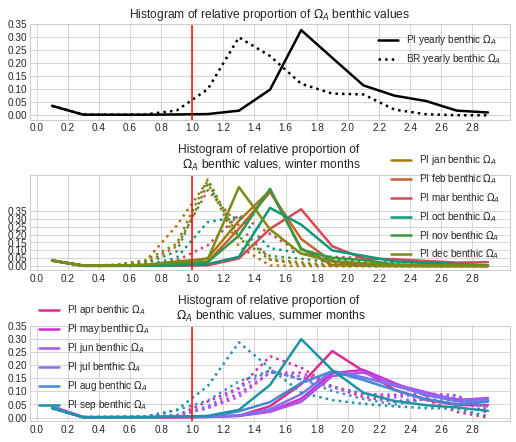

In [259]:
tcm = cm.cm.phase
# d = 
# # tcm(1.*d/12)

fact = 0.52
fig = plt.figure(figsize=(14*fact,12*fact))
lw = 2.5
ax1 = fig.add_subplot(3,1,1)
ax1.plot(bin_centres,t_PI_year,\
        color = 'black',linewidth = lw, label = 'PI yearly benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_year,\
        color = 'black',linewidth = lw, linestyle = ':', \
        label = 'BR yearly benthic $\Omega_A$')
ax1.legend(loc = 'upper right')
ax1.set_title('Histogram of relative proportion of $\Omega_A$ benthic values')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 3, step=0.2))
w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

ax1 = fig.add_subplot(3,1,2)
#months
ax1.plot(bin_centres,t_PI_jan,\
        color = tcm(1.*0/12),linewidth = lw, label = 'PI jan benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_jan,\
        color = tcm(1.*0/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_feb,\
        color = tcm(1.*1/12),linewidth = lw, label = 'PI feb benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_feb,\
        color = tcm(1.*1/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_mar,\
        color = tcm(1.*2/12),linewidth = lw, label = 'PI mar benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_mar,\
        color = tcm(1.*2/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_oct,\
        color = tcm(1.*9/12),linewidth = lw, label = 'PI oct benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_oct,\
        color = tcm(1.*9/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_nov,\
        color = tcm(1.*10/12),linewidth = lw, label = 'PI nov benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_nov,\
        color = tcm(1.*10/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_dec,\
        color = tcm(1.*11/12),linewidth = lw, label = 'PI dec benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_dec,\
        color = tcm(1.*11/12),linewidth = lw, linestyle = ':')
#
ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of \n $\Omega_A$ benthic values, winter months ')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 3, step=0.2))
w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

##
ax1 = fig.add_subplot(3,1,3)
ax1.plot(bin_centres,t_PI_apr,\
        color = tcm(1.*3/12),linewidth = lw, label = 'PI apr benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_apr,\
        color = tcm(1.*3/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_may,\
        color = tcm(1.*4/12),linewidth = lw, label = 'PI may benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_may,\
        color = tcm(1.*4/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_jun,\
        color = tcm(1.*5/12),linewidth = lw, label = 'PI jun benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_jun,\
        color = tcm(1.*5/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_jul,\
        color = tcm(1.*6/12),linewidth = lw, label = 'PI jul benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_jul,\
        color = tcm(1.*6/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_aug,\
        color = tcm(1.*7/12),linewidth = lw, label = 'PI aug benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_aug,\
        color = tcm(1.*7/12),linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_PI_sep,\
        color = tcm(1.*8/12),linewidth = lw, label = 'PI sep benthic $\Omega_A$')
ax1.plot(bin_centres,t_BR_sep,\
        color = tcm(1.*8/12),linewidth = lw, linestyle = ':')

ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of \n $\Omega_A$ benthic values, summer months ')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 3, step=0.2))
w = ax1.set_yticks(np.arange(0, 0.4, step=0.05))

plt.tight_layout()

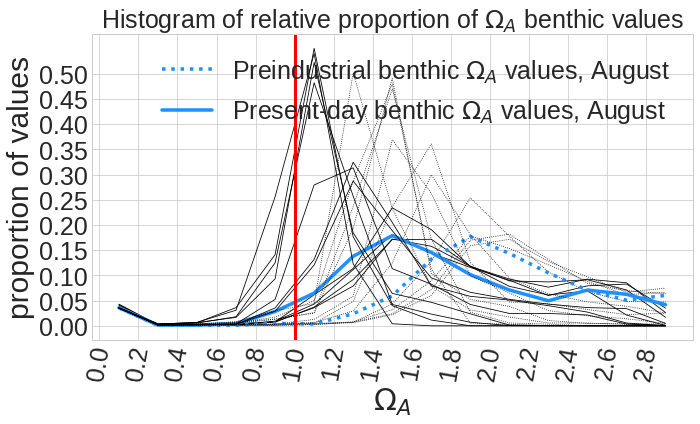

In [260]:
tcm = cm.cm.phase
# d = 
# # tcm(1.*d/12)

fact = 1
fig = plt.figure(figsize=(10*fact,6*fact))
lw = 0.8
lw2 = 3.5
##
ax1 = fig.add_subplot(1,1,1)
ax1.plot(bin_centres,t_PI_apr,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_apr,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_may,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_may,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_jun,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_jun,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_jul,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_jul,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_aug,\
        color = 'dodgerblue',linewidth = lw2, linestyle = ':', label = 'Preindustrial benthic $\Omega_A$ values, August')
ax1.plot(bin_centres,t_BR_aug,\
        color = 'dodgerblue',linewidth = lw2, linestyle = '-', label = 'Present-day benthic $\Omega_A$ values, August')
ax1.plot(bin_centres,t_PI_sep,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_sep,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_jan,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_jan,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_feb,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_feb,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_mar,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_mar,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_oct,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_oct,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_nov,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_nov,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.plot(bin_centres,t_PI_dec,\
        color = 'k',linewidth = lw, linestyle = ':')
ax1.plot(bin_centres,t_BR_dec,\
        color = 'k',linewidth = lw, linestyle = '-')
ax1.legend(loc = 'best', fontsize = 25)
ax1.set_title('Histogram of relative proportion of $\Omega_A$ benthic values', fontsize = 25)
plt.axvline(x=1, color = 'red', linewidth = 3)
w = ax1.set_xticks(np.arange(0, 3, step=0.2))
w = ax1.set_yticks(np.arange(0, 0.55, step=0.05))
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)
ax1.set_xlabel('$\Omega_A$', fontsize = 30)
ax1.set_ylabel('proportion of values', fontsize = 30)
plt.xticks(rotation=80)
plt.tight_layout()

In [261]:
w = np.where((PI_OmA_apr_benthos_avg<1e19) & (bath1_ar<30))
habitcounter = np.zeros_like(BR_OmA_dec_benthos_avg)
habitcounter[w]=1
habitcounter2 = (np.sum(habitcounter))

##### Line plots showing viable habitat vs threshold and habitat loss vs threshold (by month)

In [262]:
thresholds = np.arange(0,4.05,0.05)

BR_jan_hab = np.zeros_like(thresholds)
PI_jan_hab = np.zeros_like(thresholds)
BR_feb_hab = np.zeros_like(thresholds)
PI_feb_hab = np.zeros_like(thresholds)
BR_mar_hab = np.zeros_like(thresholds)
PI_mar_hab = np.zeros_like(thresholds)
BR_apr_hab = np.zeros_like(thresholds)
PI_apr_hab = np.zeros_like(thresholds)
BR_may_hab = np.zeros_like(thresholds)
PI_may_hab = np.zeros_like(thresholds)
BR_jun_hab = np.zeros_like(thresholds)
PI_jun_hab = np.zeros_like(thresholds)
BR_jul_hab = np.zeros_like(thresholds)
PI_jul_hab = np.zeros_like(thresholds)
BR_aug_hab = np.zeros_like(thresholds)
PI_aug_hab = np.zeros_like(thresholds)
BR_sep_hab = np.zeros_like(thresholds)
PI_sep_hab = np.zeros_like(thresholds)
BR_oct_hab = np.zeros_like(thresholds)
PI_oct_hab = np.zeros_like(thresholds)
BR_nov_hab = np.zeros_like(thresholds)
PI_nov_hab = np.zeros_like(thresholds)
BR_dec_hab = np.zeros_like(thresholds)
PI_dec_hab = np.zeros_like(thresholds)



In [263]:
list_BR_arrays_hab = [BR_jan_hab,BR_feb_hab,BR_mar_hab,\
                 BR_apr_hab,BR_may_hab,BR_jun_hab,\
                 BR_jul_hab,BR_aug_hab,BR_sep_hab,\
                 BR_oct_hab,BR_nov_hab,BR_dec_hab]
list_PI_arrays_hab = [PI_jan_hab,PI_feb_hab,PI_mar_hab,\
                 PI_apr_hab,PI_may_hab,PI_jun_hab,\
                 PI_jul_hab,PI_aug_hab,PI_sep_hab,\
                 PI_oct_hab,PI_nov_hab,PI_dec_hab]

list_BR_oc_arrays = [BR_OmA_jan_benthos_ocean,BR_OmA_feb_benthos_ocean,BR_OmA_mar_benthos_ocean,\
                 BR_OmA_apr_benthos_ocean,BR_OmA_may_benthos_ocean,BR_OmA_jun_benthos_ocean,\
                 BR_OmA_jul_benthos_ocean,BR_OmA_aug_benthos_ocean,BR_OmA_sep_benthos_ocean,\
                 BR_OmA_oct_benthos_ocean,BR_OmA_nov_benthos_ocean,BR_OmA_dec_benthos_ocean,]
list_PI_oc_arrays = [PI_OmA_jan_benthos_ocean,PI_OmA_feb_benthos_ocean,PI_OmA_mar_benthos_ocean,\
                 PI_OmA_apr_benthos_ocean,PI_OmA_may_benthos_ocean,PI_OmA_jun_benthos_ocean,\
                 PI_OmA_jul_benthos_ocean,PI_OmA_aug_benthos_ocean,PI_OmA_sep_benthos_ocean,\
                 PI_OmA_oct_benthos_ocean,PI_OmA_nov_benthos_ocean,PI_OmA_dec_benthos_ocean,]



In [264]:
np.shape(BR_OmA_jan_benthos_ocean)

(17128,)

In [265]:
for t in range(0,len(thresholds)):
    thres = thresholds[t]
#     print('')
#     print('*')
#     print(thres)
    for j in range(0,len(list_BR_oc_arrays)):
        t_ar = list_BR_oc_arrays[j]
        ar_above_thres = t_ar[t_ar>=thres]
        t_hab_BR = list_BR_arrays_hab[j]
        t_hab_BR[t] = np.size(ar_above_thres)
        #print(t_hab_BR[t])
        
        t_ar = list_PI_oc_arrays[j]
        ar_above_thres = t_ar[t_ar>=thres]
        t_hab_PI = list_PI_arrays_hab[j]
        t_hab_PI[t] = np.size(ar_above_thres)
#         print(t_hab_PI[t]) 
#         print('')



In [266]:
BR_OmA_dec_benthos_avg[0,0]
cell_counter = np.zeros_like(BR_OmA_dec_benthos_avg)
cell_counter[BR_OmA_apr_benthos_avg>1e10] =1
total_habitable_cells = 898*398 - np.sum(cell_counter)


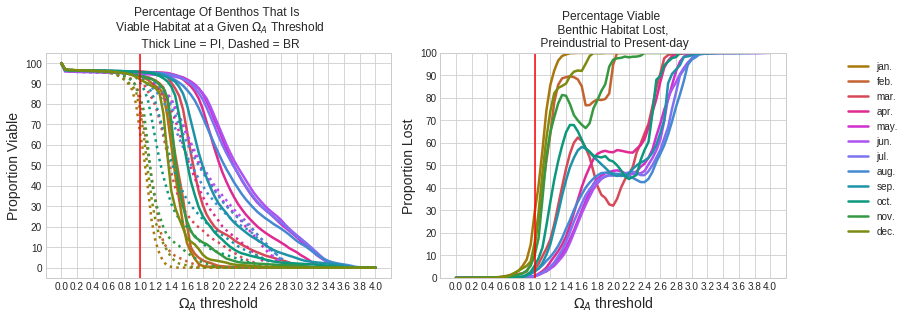

In [267]:
fact = 0.7
fig = plt.figure(figsize=(18*fact,6.5*fact))
lw = 2.5
ax = fig.add_subplot(1,2,1)
#tplt = np.ma.masked_values(PI_OmA_apr_benthos,0)

ax.plot(thresholds,100*(PI_jan_hab/habitcounter2),\
        color = tcm(1.*0/12), linewidth = lw, label = 'PI jan.')
ax.plot(thresholds,100*(BR_jan_hab/habitcounter2),\
        color = tcm(1.*0/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_feb_hab/habitcounter2),\
        color = tcm(1.*1/12), linewidth = lw, label = 'PI feb.')
ax.plot(thresholds,100*(BR_feb_hab/habitcounter2),\
        color = tcm(1.*1/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_mar_hab/habitcounter2),\
        color = tcm(1.*2/12), linewidth = lw, label = 'PI mar.')
ax.plot(thresholds,100*(BR_mar_hab/habitcounter2),\
        color = tcm(1.*2/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_apr_hab/habitcounter2),\
        color = tcm(1.*3/12), linewidth = lw, label = 'PI apr.')
ax.plot(thresholds,100*(BR_apr_hab/habitcounter2),\
        color = tcm(1.*3/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_may_hab/habitcounter2),\
        color = tcm(1.*4/12), linewidth = lw, label = 'PI may.')
ax.plot(thresholds,100*(BR_may_hab/habitcounter2),\
        color = tcm(1.*4/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_jun_hab/habitcounter2),\
        color = tcm(1.*5/12), linewidth = lw, label = 'PI jun.')
ax.plot(thresholds,100*(BR_jun_hab/habitcounter2),\
        color = tcm(1.*5/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_jul_hab/habitcounter2),\
        color = tcm(1.*6/12), linewidth = lw, label = 'PI jul.')
ax.plot(thresholds,100*(BR_jul_hab/habitcounter2),\
        color = tcm(1.*7/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_aug_hab/habitcounter2),\
        color = tcm(1.*7/12), linewidth = lw, label = 'PI aug.')
ax.plot(thresholds,100*(BR_aug_hab/habitcounter2),\
        color = tcm(1.*7/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_sep_hab/habitcounter2),\
        color = tcm(1.*8/12), linewidth = lw, label = 'PI sep.')
ax.plot(thresholds,100*(BR_sep_hab/habitcounter2),\
        color = tcm(1.*8/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_oct_hab/habitcounter2),\
        color = tcm(1.*9/12), linewidth = lw, label = 'PI oct.')
ax.plot(thresholds,100*(BR_oct_hab/habitcounter2),\
        color = tcm(1.*9/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_nov_hab/habitcounter2),\
        color = tcm(1.*10/12), linewidth = lw, label = 'PI nov.')
ax.plot(thresholds,100*(BR_nov_hab/habitcounter2),\
        color = tcm(1.*10/12), linestyle = ':', linewidth = lw)
ax.plot(thresholds,100*(PI_dec_hab/habitcounter2),\
        color = tcm(1.*11/12), linewidth = lw, label = 'PI dec.')
ax.plot(thresholds,100*(BR_dec_hab/habitcounter2),\
        color = tcm(1.*11/12), linestyle = ':', linewidth = lw)
plt.axvline(x=1, color = 'red')

ax.set_xticks(np.arange(0, 4.2, step=0.2))
ax.set_yticks(np.arange(0, 110, step=10))
ax.set_xlabel('$\Omega_A$ threshold', fontsize = 14)
ax.set_ylabel('Proportion Viable', fontsize = 14)
ax.set_title('Percentage Of Benthos That Is \n Viable Habitat at a Given $\Omega_A$ Threshold \n Thick Line = PI, Dashed = BR')

ax = fig.add_subplot(1,2,2)
#tplt = np.ma.masked_values(PI_OmA_apr_benthos,0)
ax.plot(thresholds,(100*(PI_jan_hab-BR_jan_hab)/PI_jan_hab),\
        color = tcm(1.*0/12), linewidth = lw, label = 'jan.')
ax.plot(thresholds,(100*(PI_feb_hab-BR_feb_hab)/PI_feb_hab),\
        color = tcm(1.*1/12), linewidth = lw, label = 'feb.')
ax.plot(thresholds,(100*(PI_mar_hab-BR_mar_hab)/PI_mar_hab),\
        color = tcm(1.*2/12), linewidth = lw, label = 'mar.')
ax.plot(thresholds,(100*(PI_apr_hab-BR_apr_hab)/PI_apr_hab),\
        color = tcm(1.*3/12), linewidth = lw, label = 'apr.')
ax.plot(thresholds,(100*(PI_may_hab-BR_may_hab)/PI_may_hab),\
        color = tcm(1.*4/12), linewidth = lw, label = 'may.')
ax.plot(thresholds,(100*(PI_jun_hab-BR_jun_hab)/PI_jun_hab),\
        color = tcm(1.*5/12), linewidth = lw, label = 'jun.')
ax.plot(thresholds,(100*(PI_jul_hab-BR_jul_hab)/PI_jul_hab),\
        color = tcm(1.*6/12), linewidth = lw, label = 'jul.')
ax.plot(thresholds,(100*(PI_aug_hab-BR_aug_hab)/PI_aug_hab),\
        color = tcm(1.*7/12), linewidth = lw, label = 'aug.')
ax.plot(thresholds,(100*(PI_sep_hab-BR_sep_hab)/PI_sep_hab),\
        color = tcm(1.*8/12), linewidth = lw, label = 'sep.')
ax.plot(thresholds,(100*(PI_oct_hab-BR_oct_hab)/PI_oct_hab),\
        color = tcm(1.*9/12), linewidth = lw, label = 'oct.')
ax.plot(thresholds,(100*(PI_nov_hab-BR_nov_hab)/PI_nov_hab),\
        color = tcm(1.*10/12), linewidth = lw, label = 'nov.')
ax.plot(thresholds,(100*(PI_dec_hab-BR_dec_hab)/PI_dec_hab),\
        color = tcm(1.*11/12), linewidth = lw, label = 'dec.')
plt.axvline(x=1, color = 'red')
ax.set_title('')
ax.set_ylim(0,100)
ax.legend(loc = 'lower right')
ax.set_xticks(np.arange(0, 4.2, step=0.2))
ax.set_yticks(np.arange(0, 110, step=10))
ax.set_xlabel('$\Omega_A$ threshold', fontsize = 14)
ax.set_ylabel('Proportion Lost', fontsize = 14)
ax.set_title('Percentage Viable \n Benthic Habitat Lost, \n Preindustrial to Present-day')
ax.legend(bbox_to_anchor=(1.35, 1),)
plt.tight_layout()

In [268]:
#code for checking that these numbers make sense:
# ti = 15
# print(total_habitable_cells)
# print(thresholds[ti])
# print(BR_aug_hab[ti])
# print((BR_aug_hab[ti]/total_habitable_cells)*100)


In [270]:
print()